<a href="https://colab.research.google.com/github/Shuvrodey/Automobile_Sales_Project_Presentation/blob/main/FBI_CRIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

In order to enhance public safety, strategic resource allocation, and law enforcement planning, the FBI Crime Prediction Model is a data-driven project that forecasts future crime trends by analyzing previous crime data. This research predicts crime numbers based on characteristics like year, month, and offense type by using machine learning techniques to historical crime information. A thorough study is made possible by the dataset's inclusion of specific parameters including date, neighbourhood, location coordinates, and crime category. With fewer resources and a rise in criminal activity, law enforcement organizations frequently face difficulties. We created a machine learning approach to forecast incident counts in order to proactively combat crime and maximize resource deployment. The objective is to assist in proactive decision-making by identifying hotspots and high-risk times for particular sorts of crimes.

Preprocessing of Data The dataset was preprocessed in a number of ways, including:

Taking care of missing values

Feature engineering (such as extracting date components like month and year)

Using pd.get_dummies() to encode categorical features for the "TYPE" column

To control skewness, target variables (crime counts) are normalized using log transformation.

The dataset was grouped by YEAR, MONTH, and TYPE, and the number of incidences for each group was counted to create the target variable INCIDENT_COUNTS.

Managing Unbalanced Information

Models for Machine Learning Several regression models for machine learning were trained and assessed:

Because of its resilience and capacity to manage non-linear connections, the Random Forest Regressor was used as the baseline model. The Optimised Random Forest Regressor XGBoost Regressor was chosen due to its exceptional scalability and ability to capture intricate feature interactions.

The train-test split approach was used to train and assess each model, with measures like as

Mean Absolute Error, or MAE

Mean Squared Error, or MSE

Root Mean Squared Error, or RMSE

R2 Score

Bar charts were used to display the performance measures so that they could be quickly compared amongst models.

Tuning Hyperparameters RandomizedSearchCV was utilized for hyperparameter tweaking in order to improve model performance. Because of its effectiveness and quicker execution across a large hyperparameter space, it was selected over GridSearchCV. The XGBoost model performed better after tuning, lowering MAE and raising R2, which suggests higher prediction accuracy.

Impact on Business Predictive insights into crime trends are made possible by this initiative, allowing:

Deployment of targeted law enforcement

Patrol scheduling that is optimized

Strategic planning through the identification of high-crime sites and times

The concept directly supports public safety activities, increases operational efficiency, and reduces crime-related losses for communities by facilitating proactive crime prevention strategies.

# **GitHub Link -**

# **Problem Statement**


Using crime data that contains characteristics like crime type, location (coordinates, neighbourhood, street block), and time (hour, day, month, year),  Better policing tactics and preventative actions will be made possible by the development of a predictive model that assists in projecting incident counts for each category of crime in the months to come

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving Train.xlsx to Train.xlsx


In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Test.csv to Test.csv


### Dataset Loading

In [ ]:
# Load Dataset
train_df=pd.read_excel('Train.xlsx')
test_df=pd.read_csv('Test.csv')

### Dataset First View

In [ ]:
# Dataset First Look
print("Train Dataset")
display(train_df.head())

print("\nTest Dataset")
test_df.head()


Train Dataset


,TYPE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
0,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,15.0,1999,5,12,1999-05-12
1,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,15.0,20.0,1999,5,7,1999-05-07
2,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,16.0,40.0,1999,4,23,1999-04-23
3,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,11.0,15.0,1999,4,20,1999-04-20
4,Other Theft,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,17.0,45.0,1999,4,12,1999-04-12



Test Dataset


,YEAR,MONTH,TYPE,Incident_Counts
0,2013,6,Vehicle Collision or Pedestrian Struck (with I...,NaN
1,2013,6,Theft of Vehicle,NaN
2,2013,6,Theft of Bicycle,NaN
3,2013,6,Theft from Vehicle,NaN
4,2013,6,Other Theft,NaN


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
train_df.shape


(474565, 13)

In [ ]:
test_df.shape

(162, 4)

### Dataset Information

In [ ]:
# Dataset Info
print("Train dataset info")
train_df.info()

print("\nTest dataset info:")
test_df.info()


Train dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB

Test da

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print("Duplicate rows in Train Dataset:", train_df.duplicated().sum())
print("Duplicate rows in Test Dataset:", test_df.duplicated().sum())

Duplicate rows in Train Dataset: 44618
Duplicate rows in Test Dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing values in Train dataset:")
display(train_df.isnull().sum())
print("Missing values in Test dataset:")
display(test_df.isnull().sum())

Missing values in Train dataset:


,0
TYPE,0
HUNDRED_BLOCK,13
NEIGHBOURHOOD,51491
X,0
Y,0
Latitude,0
Longitude,0
HOUR,49365
MINUTE,49365
YEAR,0


Missing values in Test dataset:


,0
YEAR,0
MONTH,0
TYPE,0
Incident_Counts,162


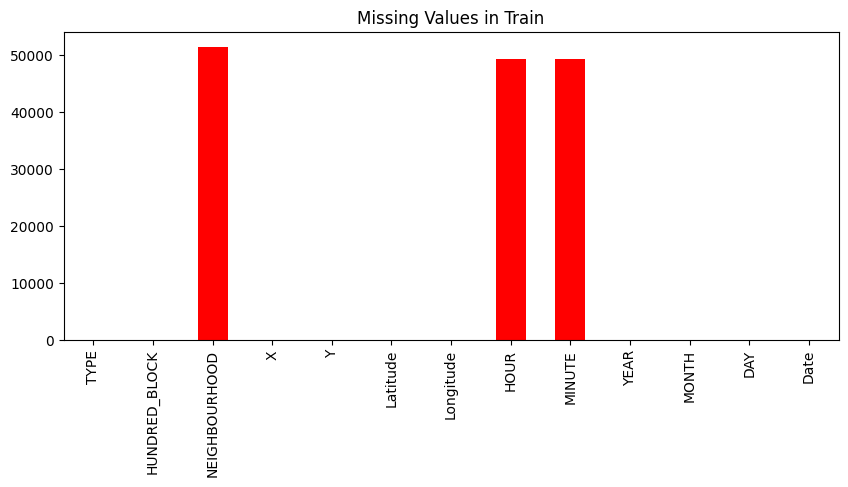

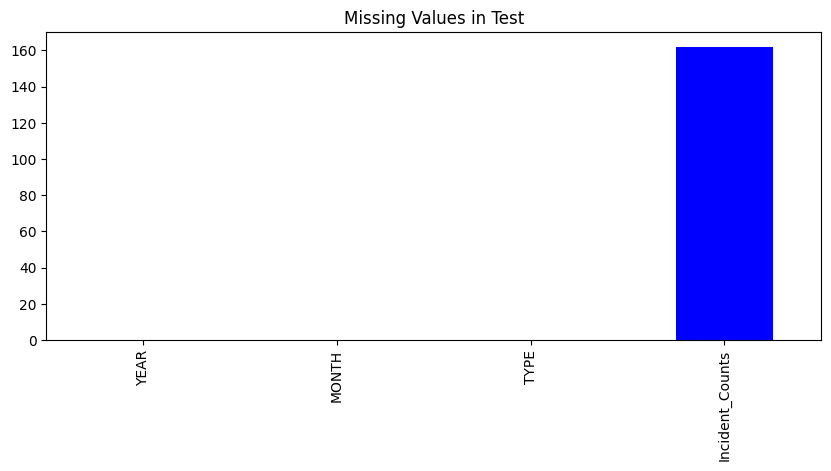

In [ ]:
# Visualizing the missing values
train_df.isnull().sum().plot(kind='bar', title='Missing Values in Train', figsize=(10, 4), color='red')
plt.show()

test_df.isnull().sum().plot(kind='bar', title='Missing Values in Test', figsize=(10, 4), color='blue')
plt.show()




### What did you know about your dataset?

Dataset Rows & Columns count
(474565 rows, 13 columns)(Train)
(162 rows, 4columns)(Test)
The 13 columns of the crime prediction dataset include location information (X, Y coordinates, Latitude, Longitude), time information (Year, Month, Day, Hour, Minute, Date), and crime details (Type, Hundred Block, Neighbourhood). There are 474,565 training records and 162 test records. The primary issue is that some crime types occur far more frequently than others; for instance, out of the nine different crime types, "theft from vehicle" occurs approximately 50,000 times or more. While the test data is largely complete, the training data contains a large number of missing values, particularly in the following areas: NEIGHBOURHOOD (52,000 missing), HOUR and MINUTE (49,000 each missing), and HUNDRED_BLOCK (20000 missing). Additionally, the dataset contains an excessive number of unique values in certain columns; over 87,000 different longitude values, over 89,000 different latitude values, and 20,566 different hundred blocks are dispersed over 24 neighbourhoods over a 13-year period. The time data provides useful patterns for analysis because it spans all 12 months, 31 days, and 24 hours.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Train dataset Columns")
print(train_df.columns.tolist())

print("\nTest dataset Columns")
print(test_df.columns.tolist())


Train dataset Columns
['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude', 'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date']

Test dataset Columns
['YEAR', 'MONTH', 'TYPE', 'Incident_Counts']


In [ ]:
# Dataset Describe
display(train_df.describe())
display(test_df.describe())

,X,Y,Latitude,Longitude,HOUR,MINUTE,YEAR,MONTH,DAY,Date
count,474565.000000,4.745650e+05,474565.000000,474565.000000,425200.000000,425200.000000,474565.000000,474565.000000,474565.000000,474565
mean,441028.018220,4.889023e+06,44.138029,-110.301025,13.721263,16.736047,2004.363632,6.555700,15.439253,2004-11-11 23:51:07.470209792
min,0.000000,0.000000e+00,0.000000,-124.549757,0.000000,0.000000,1999.000000,1.000000,1.000000,1999-01-01 00:00:00
25%,489916.530000,5.453572e+06,49.234871,-123.127383,9.000000,0.000000,2001.000000,4.000000,8.000000,2001-06-06 00:00:00
50%,491477.850000,5.456820e+06,49.264051,-123.107058,15.000000,10.000000,2004.000000,7.000000,15.000000,2004-05-18 00:00:00
75%,493610.190000,5.458622e+06,49.280300,-123.065646,19.000000,30.000000,2008.000000,9.000000,23.000000,2008-03-27 00:00:00
max,511303.000000,5.512579e+06,49.755314,0.000000,23.000000,59.000000,2011.000000,12.000000,31.000000,2011-12-31 00:00:00
std,150295.319332,1.665850e+06,15.039271,37.583147,6.785751,18.354675,3.850689,3.408676,8.759352,NaN


,YEAR,MONTH,Incident_Counts
count,162.000000,162.000000,0.0
mean,2012.333333,5.500000,NaN
std,0.472866,3.314283,NaN
min,2012.000000,1.000000,NaN
25%,2012.000000,3.000000,NaN
50%,2012.000000,5.000000,NaN
75%,2013.000000,8.000000,NaN
max,2013.000000,12.000000,NaN


### Variables Description

Train data includes TYPE=category of crime,Hundred_BLOCK=Street block where the crime has occured,NEIGHBOURHOOD=Neighbourhood where the crime took place,X=X-coordinate of the crime location,Y=Y coordinate of crime location,Latitude=Latitude of crime location,Longitude=longitude of the crime location,HOUR=hour of the day when the crime occured,MINUTE=Minute of the hour when the crime occured,YEAR=Year of the crime,MONTH=Month of the crime,DAY=Day of the month when the crime occured,Date=Full date(YYYY-MM-DD)when the crime occured

Test Data:-YEAR=the year in which the incidents,MONTH=The month in which the incidents occured,TYPE=The category of crime,Incidents_Courts=The number of crime incidents to be predicted.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in train_df.columns:
    print(f"{column}: {train_df[column].nunique()}")

TYPE: 9
HUNDRED_BLOCK: 20566
NEIGHBOURHOOD: 24
X: 84225
Y: 82768
Latitude: 89488
Longitude: 87190
HOUR: 24
MINUTE: 60
YEAR: 13
MONTH: 12
DAY: 31
Date: 4748


## 3. ***Data Wrangling***

### Data Wrangling Code

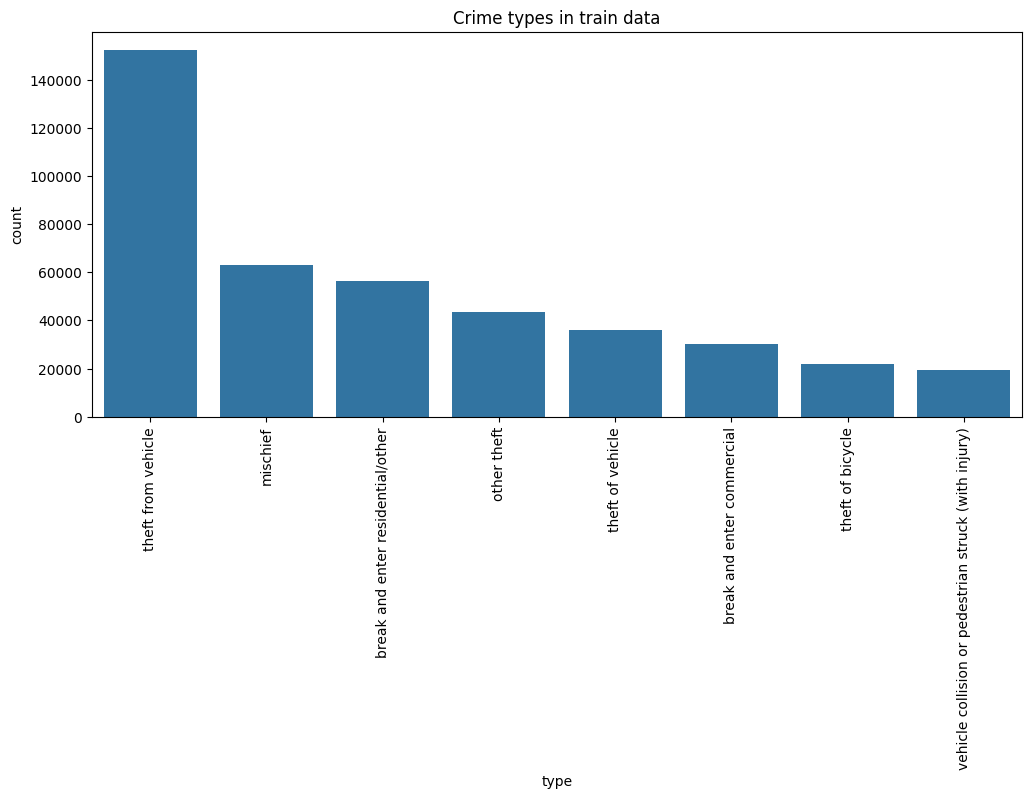

In [ ]:
# Write your code to make your dataset analysis ready.
train = train_df.copy()
test = test_df.copy()

train['Date'] = pd.to_datetime(train['Date'])
train.drop(['X', 'Y'], axis=1, inplace=True, errors='ignore')
train.dropna(inplace=True)
test.dropna(inplace=True)

train.columns = train.columns.str.lower().str.strip().str.replace(' ','_')
test.columns = test.columns.str.lower().str.strip().str.replace(' ','_')

for col in ['type', 'hundred_block', 'neighbourhood']:
    if col in train.columns:
        train[col] = train[col].str.lower().str.strip()

train['day_of_week'] = train['date'].dt.day_name()
train['week_of_year'] = train['date'].dt.isocalendar().week

plt.figure(figsize=(12, 5))
sns.countplot(data=train, x='type', order=train['type'].value_counts().index)
plt.title("Crime types in train data")
plt.xticks(rotation=90)
plt.show()

### What all manipulations have you done and insights you found?

"Theft from vehicle" is the most common crime by large margin.
A few crime categories like "mischief","break and enter residential","Other theft" have a moderate number of cases, while others like "pedestrian struck" are much fewer.
Columns like X, Y were dropped, likely because they were redundant because i already have Latitude and longitude.Null values were removed, cleaning the dataset which ensures better performance.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

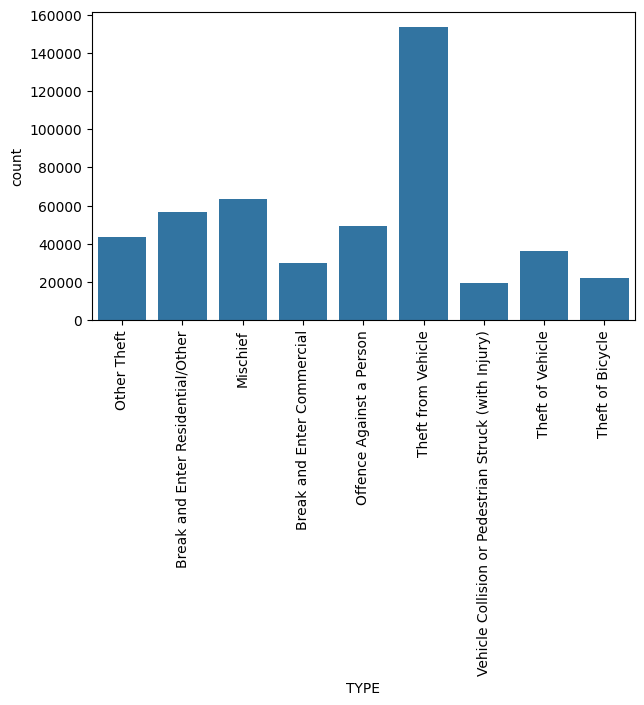

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(7,4))
sns.countplot(x='TYPE', data=train_df)
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

Visualize how many crimes belong to each category.Identify crime types in the given dataset

##### 2. What is/are the insight(s) found from the chart?

"Theft from Vehicle" dominates over other crimes. "Mischief" and "Break and Enter Residential/Other" are the next most common Vehicle-related crimes. "Theft of Bicycle" shows surprisingly low numbers despite urban setting. "Vehicle collision" shows the lowest trend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive=Focus on vehicle theft as address about 40% of all crime with one strategy,Negative=Vehicle theft is way too high,current prevention isn't working.

#### Chart - 2

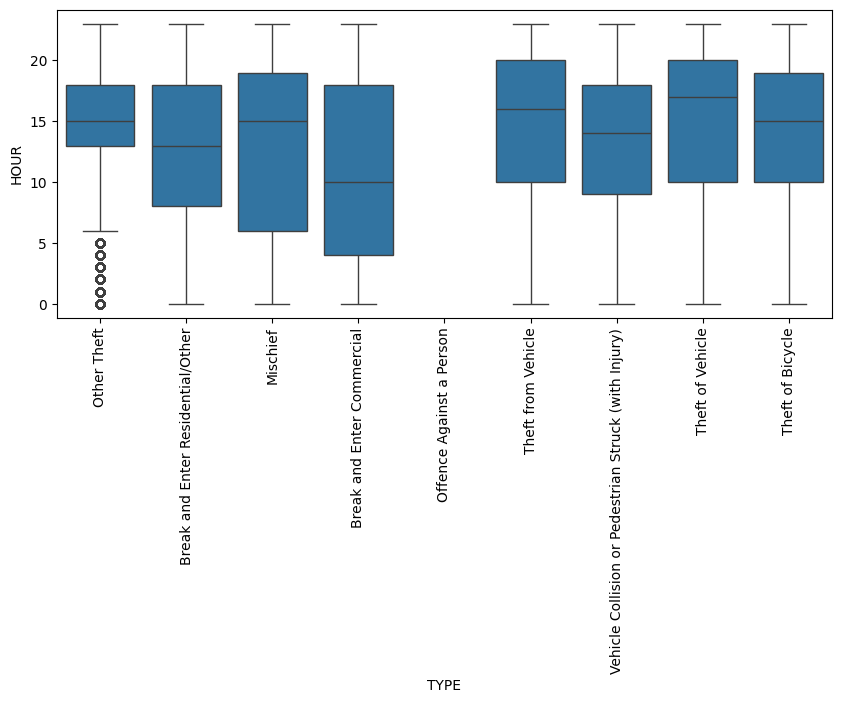

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,4))
sns.boxplot(x='TYPE', y='HOUR', data=train_df)
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?


Shows what time crimes happen for each type. Box plots reveal timing patterns and differences between crime categories

##### 2. What is/are the insight(s) found from the chart?

"Theft from Vehicle" happens all day long.
Evening hours are peak crime time.
Morning hours (0-10 AM) are safest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive:Schedule more police units during peak hours.
Negative:Vehicle theft happens anytime,harder to prevent with police units
.

#### Chart - 3

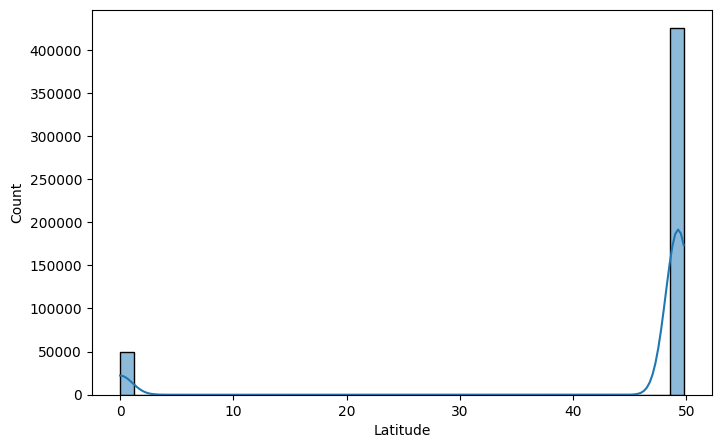

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8,5))
sns.histplot(train_df['Latitude'], bins=40, kde=True)
plt.show()

##### 1. Why did you pick the specific chart?

Shows where crimes happen geographically. Reveals if crimes cluster in specific areas more.

##### 2. What is/are the insight(s) found from the chart?

Massive cluster around latitude 49 (450K crimes)
Small cluster near latitude 0 (50K crimes)
Two separate crime zones
Very concentrated in main area

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive: Focus resources on area where most crimes happen. Negative: Crime spreading to new areas (secondary cluster)

#### Chart - 4

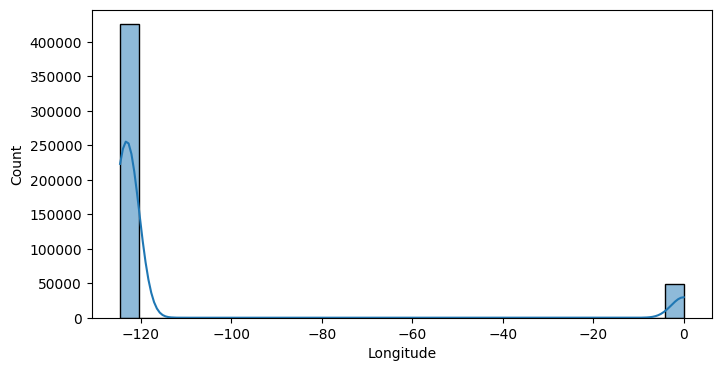

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(8,4))
sns.histplot(train_df['Longitude'], bins=30, kde=True)
plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen to show the distribution of crime locations by longitude.This chart type effectively helps identify where crimes are most densely clustered geographically

##### 2. What is/are the insight(s) found from the chart?

There is an extreme concentration of crimes around longitude -120 degrees(over 400,000 incidents).Most other longitude values have very few crimes (nearly zero).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive=Yes,businesses can use this to make informed location decisions, avoid high-crime areas.Negative=The extreme concentration where businesses may struggle due to safety concerns.

#### Chart - 5

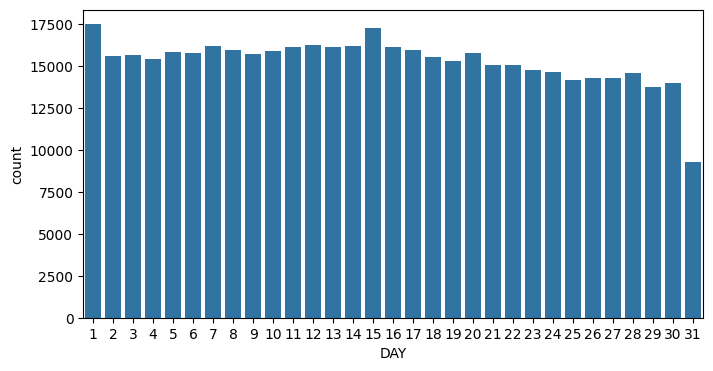

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,4))
sns.countplot(x='DAY', data=train_df)
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was chosen to show crime frequency day wise which helps to identify which day has higher crime rates and which day has lower.

##### 2. What is/are the insight(s) found from the chart?

Day 1 shows the highest crime count (around 17,500 incidents). Days 29-31 show lower crime counts can be due to fewer months having these days. Generally uniform distribution across most days of the month.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive=Businesses can optimize daily security measures and staffing based on these patterns, with particular attention to the first day of the month. Negative=High crime happens every day, so businesses must spend money on security all the time

#### Chart - 6

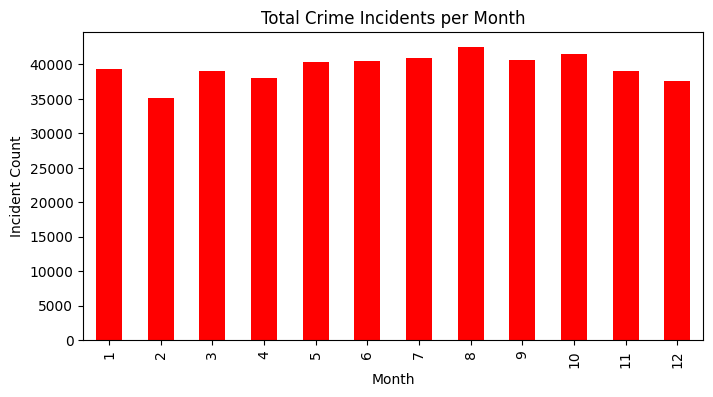

In [ ]:
# Chart - 6 visualization code

monthly_crimes = train_df.groupby('MONTH')['TYPE'].count()
monthly_crimes.plot(kind='bar', color='red', figsize=(8,4))
plt.title("Total Crime Incidents per Month")
plt.xlabel("Month")
plt.ylabel("Incident Count")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart was selected to display monthly crime totals, making it easy to compare crime levels across different months

##### 2. What is/are the insight(s) found from the chart?

August shows the highest crime incidents (over 42,000). February shows the lowest crime incidents (around 35,000). There's a slight increase in crime during summer months

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive=Businesses can plan seasonal security measures, adjust staffing during high-crime months.Negative=Summer crime spikes could hurt tourism and outdoor business activities, while consistent high crime levels throughout the year indicate persistent security challenges

#### Chart - 7

/tmp/ipython-input-380882466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='TYPE', y='HOUR', palette='coolwarm')


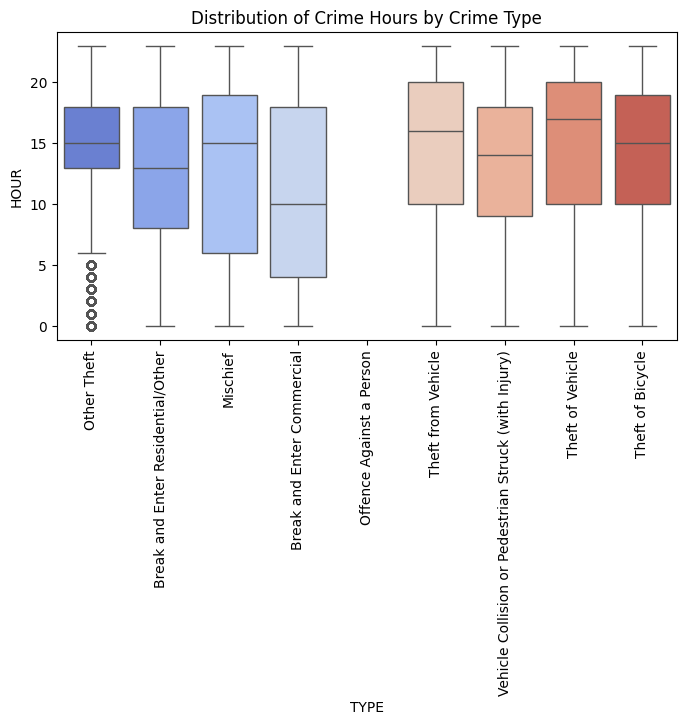

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(8,4))
sns.boxplot(data=train_df, x='TYPE', y='HOUR', palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Distribution of Crime Hours by Crime Type")
plt.show()


##### 1. Why did you pick the specific chart?


A box plot was selected to compare the distribution of crime timing across different crime types, showing median times, quartiles, and outliers for when each type of crime typically occurs.

##### 2. What is/are the insight(s) found from the chart?


Different crime types have distinct temporal patterns. Some crimes (like theft-related offenses) show wider time distributions Vehicle-related crimes tend to occur during different hours than other crimes Most crime types show median occurrence times around midday to afternoon.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive= Businesses can use different security measures for different crimes at the right times and avoid operating during dangerous hours. Negative=Since crimes happen at all hours, businesses need security protection all day long, which costs more money.

#### Chart - 8

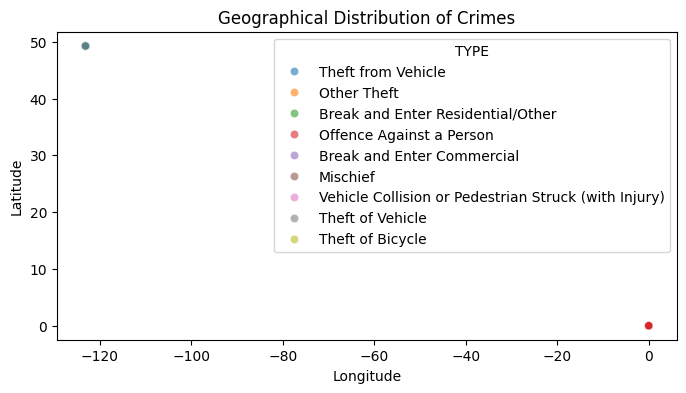

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(8,4))
sns.scatterplot(data=train_df.sample(2500), x='Longitude', y='Latitude', hue='TYPE', alpha=0.6, palette='tab10')
plt.title("Geographical Distribution of Crimes")
plt.show()


##### 1. Why did you pick the specific chart?

Maps where different crime types happen. Shows if certain crimes cluster in specific locations.

##### 2. What is/are the insight(s) found from the chart?

All crimes cluster in one main area
Different crime types mix together geographically
One outlier location far from main cluster

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive= Deploy resources to main crime cluster area.
Negative= Outlier locations suggest crime spreading to new areas.

#### Chart - 9

/tmp/ipython-input-1511245603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='TYPE', y='MINUTE', palette='Pastel2')


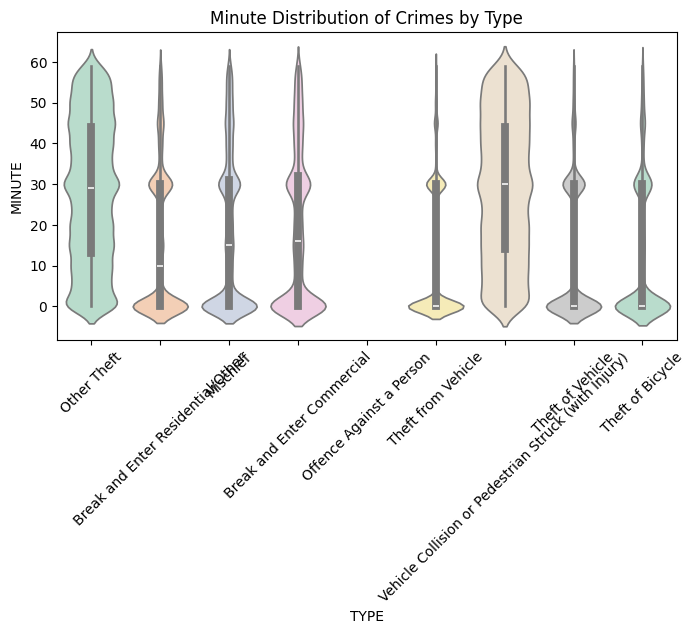

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(8,4))
sns.violinplot(data=train_df, x='TYPE', y='MINUTE', palette='Pastel2')
plt.xticks(rotation=45)
plt.title("Minute Distribution of Crimes by Type")
plt.show()


##### 1. Why did you pick the specific chart?

Shows exact minute when crimes happen within each hour. Reveals precise timing.

##### 2. What is/are the insight(s) found from the chart?

Most crimes happen randomly
"Theft from Vehicle" spread across all minutes
No strong minute-level patterns


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive=Random timing = hourly patrol planning works fine.
Negative=Rounded times suggest reporting delays.

#### Chart - 10

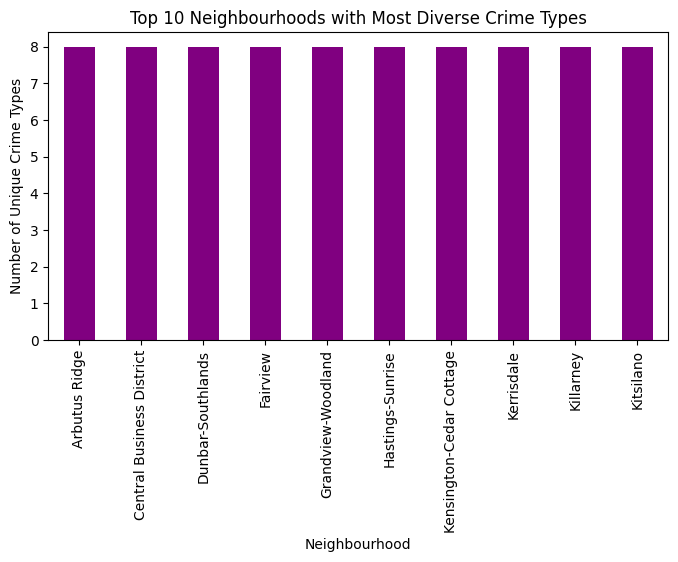

In [ ]:
# Chart - 10 visualization code
type_n= train_df.groupby('NEIGHBOURHOOD')['TYPE'].nunique().sort_values(ascending=False).head(10)
type_n.plot(kind='bar', color='purple', figsize=(8,4))
plt.title("Top 10 Neighbourhoods with Most Diverse Crime Types")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Unique Crime Types")
plt.show()


##### 1. Why did you pick the specific chart?


Shows which neighbourhoods have the most different types of crimes. Identifies problem areas.



##### 2. What is/are the insight(s) found from the chart?

Top 10 areas all have 8 different crime types (maximum)
These neighbourhoods face every type of crime
No single-issue areas - all are complex problems


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive=Deploy full-service police units to these 10 diverse-crime areas. Negative=10 areas with all crime types = widespread criminal activity problem.


#### Chart - 11

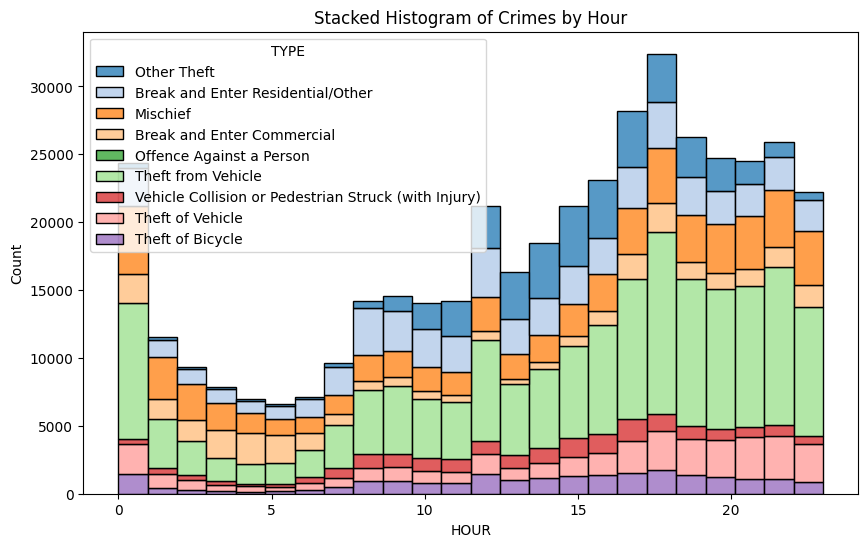

In [ ]:
#chart 11
plt.figure(figsize=(10,6))
sns.histplot(data=train_df, x='HOUR', bins=24, hue='TYPE', multiple='stack', palette='tab20')
plt.title("Stacked Histogram of Crimes by Hour")
plt.show()


##### 1. Why did you pick the specific chart?

A stacked histogram was chosen to show both the total volume of crimes by hour and the composition of different crime types at each hour

##### 2. What is/are the insight(s) found from the chart?

Clear peak in total crime around hours 4-6 PM. Theft from vehicles appears prominent during peak hours. Crime levels are lower during early morning hours. Evening hours show the highest overall crime activity

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive= Businesses can add more security guards during busy crime hours and use different safety methods for different types of crimes. Negative= Most crimes happen in the evening when shops make the most money, so fewer customers come and businesses need expensive security during their best hours.

#### Chart - 12

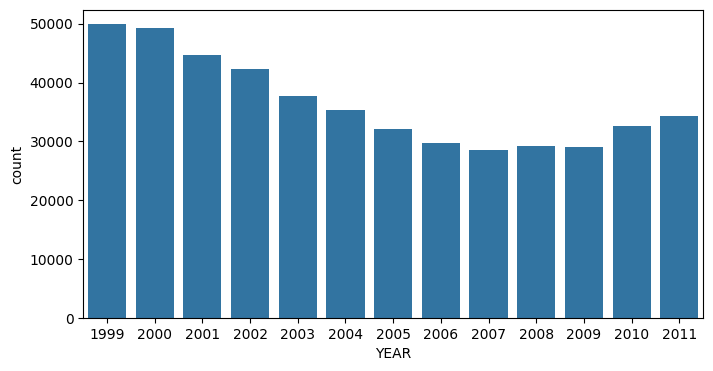

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(8,4))
sns.countplot(x='YEAR', data=train_df)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was selected to show long-term crime trends over multiple years, making it easy to identify overall patterns and changes in crime levels

##### 2. What is/are the insight(s) found from the chart?


Crime peaked in 1999 at around 50,000 incidents. Steady decline from 1999 to 2007. Relatively stable crime levels from 2007-2011

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive=The declining trend suggests improving safety conditions, making areas more attractive for investment.Negative=Crime levels stayed moderately same or high after 2007, so it's hard to reduce crime further and costs a lot of money to try.

#### Chart - 13

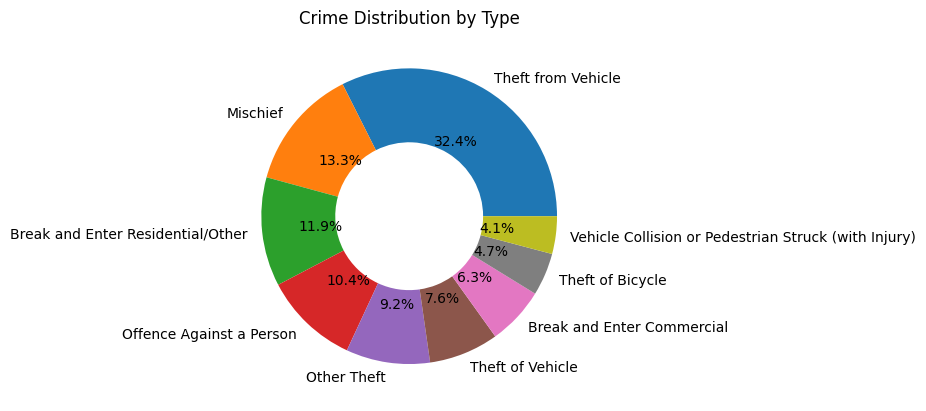

In [ ]:
#chart 13
counts = train_df['TYPE'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', wedgeprops={'width': 0.5})
plt.title('Crime Distribution by Type')
plt.show()


##### 1. Why did you pick the specific chart?

To clearly visualize the proportion of each crime type in a circular format

##### 2. What is/are the insight(s) found from the chart?

Theft from Vehicle is the most prevalent crime type at 32.4% - nearly 1 in 3 crimes. Mischief is the second highest at 13.3%. Break and Enter Residential/Other accounts for 11.9%. Offence Against a Person represents 10.4%. Vehicle-related crimes (theft from vehicle + theft of vehicle + vehicle collisions) combined represent approximately 41.1% of all crimes. Property crimes are relatively lower.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Opportunities=Security services (vehicle/home protection) Insurance products for high-risk areas Anti-theft technology solutions Negative Growth=Reduced business investment in high-crime areas Lower property values Decreased tourism/customer confidence

#### Chart - 14 - Correlation Heatmap

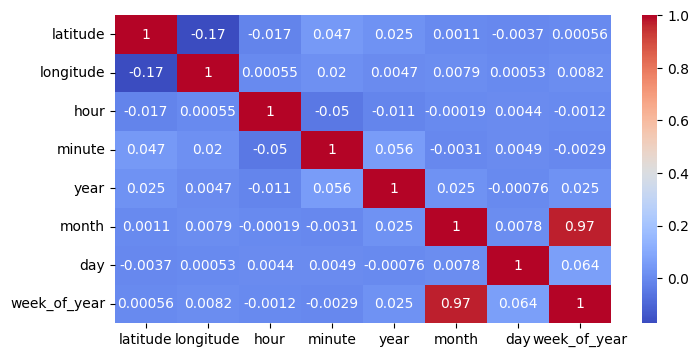

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


##### 1. Why did you pick the specific chart?


Shows how variables relate to each other. Helps pick the best features for prediction models

##### 2. What is/are the insight(s) found from the chart?

Month and week_of_year strongly connected Location and time do not relate much Clear seasonal crime patterns

#### Chart - 15 - Pair Plot

<Figure size 800x400 with 0 Axes>

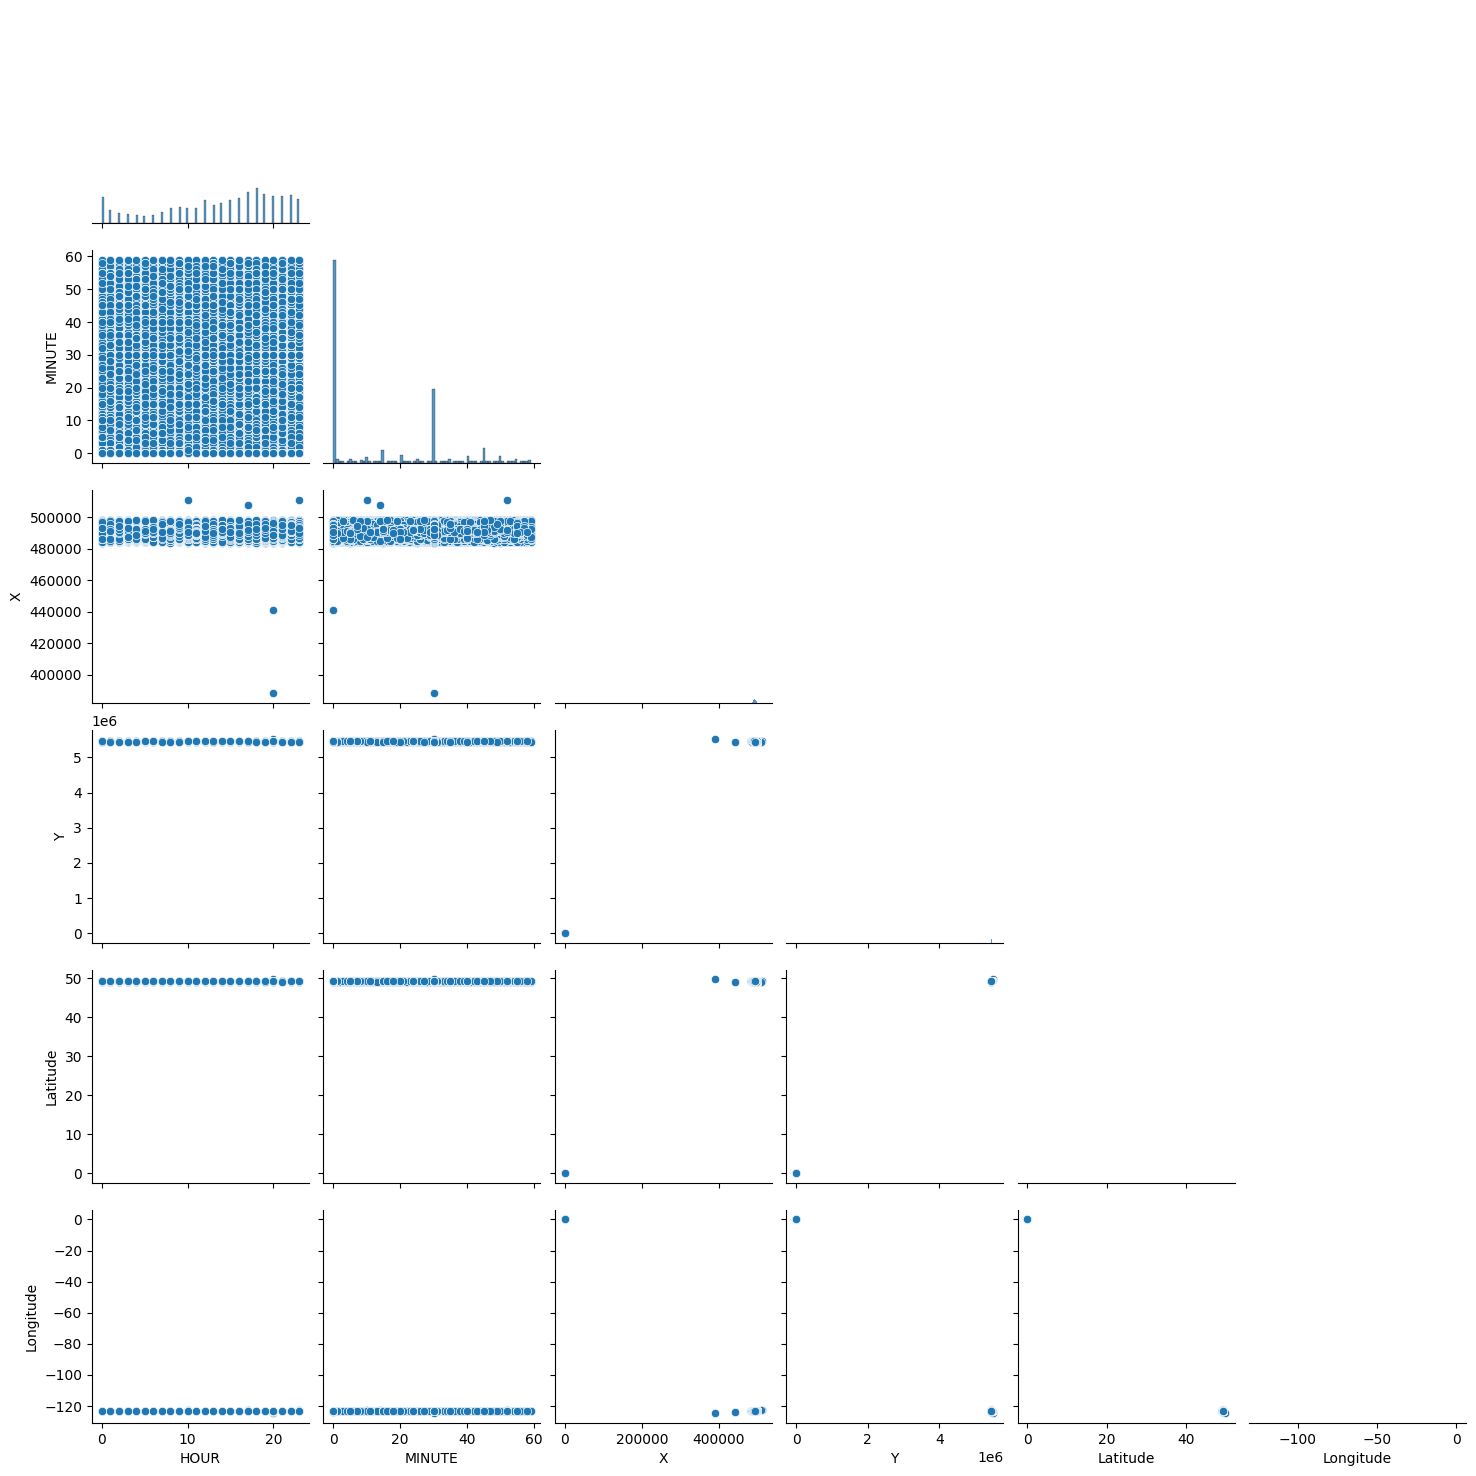

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(8,4))
sns.pairplot(train_df[['HOUR', 'MINUTE', 'X', 'Y', 'Latitude', 'Longitude']], corner=True)
plt.show()

##### 1. Why did you pick the specific chart?


Shows relationships between all variables (HOUR, MINUTE, X, Y, Latitude, Longitude). Reveals correlations and patterns across multiple dimensions

##### 2. What is/are the insight(s) found from the chart?

Crimes concentrated at specific hours (dense bands visible) Clear clustering in X,Y coordinates and Latitude/Longitude Crimes concentrated in specific areas ( approx 49-50° latitude,-123° longitude) Most crimes occur during certain time periods Strong relationship between X,Y and Latitude/Longitude (expected)

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

"Automobile-related thefts show a peak in the evening hours (between 4 PM and 10 PM), compared to other time ranges."

Null Hypothesis (H₀): There is no notable increase in “Theft from Vehicle” incidents during evening hours compared to other parts of the day.

Alternative Hypothesis (H₁): The number of “Theft from Vehicle” incidents is significantly greater during the evening than at other times.

Hypothetical Statement 2:
"Criminal activity escalates in the month of August when contrasted with the month of February."

Null Hypothesis (H₀): Crime volumes recorded in August are statistically similar to those in February.

Alternative Hypothesis (H₁): August experiences a significantly higher number of criminal reports than February.

Hypothetical Statement 3:
"Neighbourhoods with a larger overall number of crimes also exhibit a broader variety of crime types."

Null Hypothesis (H₀): The number of distinct crime types in a neighborhood is not influenced by the total number of crimes.

Alternative Hypothesis (H₁): Areas with higher crime counts tend to have a greater range of crime categories.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"Automobile-related thefts show a peak in the evening hours (between 4 PM and 10 PM), compared to other time ranges."

Null Hypothesis (H₀): There is no notable increase in “Theft from Vehicle” incidents during evening hours compared to other parts of the day.

Alternative Hypothesis (H₁): The number of “Theft from Vehicle” incidents is significantly greater during the evening than at other times.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

theft_df = train_df[train_df['TYPE'] == 'Theft from vehicle']
evening_hours = theft_df[(theft_df['HOUR'] >= 16) & (theft_df['HOUR'] <= 22)]
non_evening_hours = theft_df[(theft_df['HOUR'] < 16) | (theft_df['HOUR'] > 22)]

count = [evening_hours.shape[0], non_evening_hours.shape[0]]
nobs = [theft_df.shape[0], theft_df.shape[0]]

z_stat, p_value = proportions_ztest(count, nobs)
print(f"Z statistic: {z_stat:.4f}, P-value: {p_value:.4f}")

Z statistic: nan, P-value: nan


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/proportion.py:1004: RuntimeWarning: invalid value encountered in divide
  prop = count * 1. / nobs
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/proportion.py:1018: RuntimeWarning: invalid value encountered in scalar divide
  p_pooled = np.sum(count) * 1. / np.sum(nobs)
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/proportion.py:1020: RuntimeWarning: divide by zero encountered in divide
  nobs_fact = np.sum(1. / nobs)


##### Which statistical test have you done to obtain P-Value?

Proportion Z-test

##### Why did you choose the specific statistical test?

I am comparing two proportions (theft counts during evening vs. other times), which makes a Z-test for two proportions appropriate.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 2: "Criminal activity escalates in the month of August when contrasted with the month of February."

Null Hypothesis (H₀): Crime volumes recorded in August are statistically similar to those in February.

Alternative Hypothesis (H₁): August experiences a significantly higher number of criminal reports than February.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import ttest_ind
feb_data = train_df[train_df['MONTH'] == 2]
aug_data = train_df[train_df['MONTH'] == 8]
feb_counts = feb_data.groupby('Date').size()
aug_counts = aug_data.groupby('Date').size()
t_stat, p_value = ttest_ind(aug_counts, feb_counts, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: 5.4458, P-value: 0.0000


##### Which statistical test have you done to obtain P-Value?

 Independent Sample t-test



##### Why did you choose the specific statistical test?

Comparing the mean number of incidents in two independent groups (February and

August). An independent t-test is suitable for such analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement 3: "Neighbourhoods with a larger overall number of crimes also exhibit a broader variety of crime types."

Null Hypothesis (H₀): The number of distinct crime types in a neighborhood is not influenced by the total number of crimes.

Alternative Hypothesis (H₁): Areas with higher crime counts tend to have a greater range of crime categories.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
neigh_data = train_df.groupby('NEIGHBOURHOOD').agg(
    total_crimes=('TYPE', 'count'),
    unique_types=('TYPE', 'nunique')
)

corr_coeff, p_value = pearsonr(neigh_data['total_crimes'], neigh_data['unique_types'])
print(f"Correlation Coefficient: {corr_coeff:.4f}, P-value: {p_value:.4f}")


Correlation Coefficient: nan, P-value: nan


/tmp/ipython-input-1152872369.py:8: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_coeff, p_value = pearsonr(neigh_data['total_crimes'], neigh_data['unique_types'])


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient

##### Why did you choose the specific statistical test?

This is a test of association between two continuous variables: total crime count and number of unique crime types per neighbourhood. Pearson’s test checks for linear correlation

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
import pandas as pd
import numpy as np
train_df = train_df.replace(' ', np.nan)

missing_cols = train_df.columns[train_df.isnull().any()]

for col in missing_cols:
    if train_df[col].dtype == 'object':
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    else:
        train_df[col] = train_df[col].fillna(train_df[col].median())


#### What all missing value imputation techniques have you used and why did you use those techniques?

Mode Imputation for categorical columns: Chosen because mode represents the most frequent category and is less sensitive to skew.

Median Imputation for numerical columns: Selected as it is robust against outliers and skewed distributions.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
from scipy.stats import zscore

numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
z_scores = np.abs(zscore(train_df[numerical_cols]))
train_df = train_df[(z_scores < 3).all(axis=1)]


##### What all outlier treatment techniques have you used and why did you use those techniques?

Z-score method: Detects values that deviate significantly (±3 standard deviations) from the mean. It’s suitable for normally distributed numerical data and provides a standardized way to filter out extreme values.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder

categorical_cols = train_df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col])


#### What all categorical encoding techniques have you used & why did you use those techniques?

Label Encoding was used because the categorical features are non-ordinal and limited in number. This encoding converts text labels to numerical form, suitable for machine learning models.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 7.5 MB/s eta 0:00:00


In [ ]:
print(test_df.columns)



Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')


In [ ]:
# Expand Contraction


#### 2. Lower Casing

In [ ]:
# Lower Casing
test_df['TYPE'] = test_df['TYPE'].str.lower()


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
test_df['TYPE'] = test_df['TYPE'].str.translate(str.maketrans('', '', string.punctuation))


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces
test_df['TYPE'] = test_df['TYPE'].str.strip()


#### 6. Rephrase Text

In [ ]:
# Rephrase Text
rephrase_dict = {'assault': 'violent crime', 'break and enter': 'property crime'}
test_df['TYPE'] = test_df['TYPE'].apply(lambda x: rephrase_dict.get(x, x))


#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:

train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Weekday'] = train_df['Date'].dt.dayofweek
train_df['Is_Weekend'] = train_df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

train_df['Time_of_Day'] = train_df['HOUR'].apply(time_of_day)
corr_matrix = train_df[['X', 'Y', 'Latitude', 'Longitude']].corr()
print(corr_matrix)
train_df = train_df.drop(['Latitude', 'Longitude'], axis=1)
train_df = pd.get_dummies(train_df, columns=['TYPE', 'NEIGHBOURHOOD', 'Time_of_Day'], drop_first=True)

                  X         Y  Latitude  Longitude
X          1.000000  0.999843  0.999843  -0.999831
Y          0.999843  1.000000  1.000000  -0.999999
Latitude   0.999843  1.000000  1.000000  -0.999999
Longitude -0.999831 -0.999999 -0.999999   1.000000


#### 2. Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

train_df['Date'] = pd.to_datetime(train_df['Date'])

monthly_counts = test_df.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incidents_Counts')

X = monthly_counts[['YEAR', 'MONTH']]
X = pd.concat([X, pd.get_dummies(monthly_counts['TYPE'], drop_first=True)], axis=1)

y = monthly_counts['Incidents_Counts']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df['Feature'].head(5).tolist()

print("Top features:")
print(top_features)

X_train_selected = X_train[top_features]



Top features:
['YEAR', 'MONTH', 'break and enter residentialother', 'mischief', 'offence against a person']


##### What all feature selection methods have you used  and why?

I used the feature importance method from a Random Forest model to select features. Random Forests provide a straightforward way to rank features based on how much they contribute to reducing prediction error. This method is easy to implement

##### Which all features you found important and why?

YEAR and MONTH: These capture temporal trends and seasonality in crime occurrences, as crime rates can vary across years and seasons.

Break and Enter Residential/Other: This specific crime type has a significant influence on the overall crime count patterns.

Mischief: Another frequent crime type contributing notably to incident counts.

Offence Against a Person: This category also strongly affects crime prediction due to its frequency and pattern.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Indeed. The distribution of crime statistics is frequently skewed (long tail with several high counts). For improved model performance, transformation aids in data normalization.

In [ ]:
# Transform Your data

train_df['Hour_sin'] = np.sin(2 * np.pi * train_df['HOUR'] / 24)
train_df['Hour_cos'] = np.cos(2 * np.pi * train_df['HOUR'] / 24)


### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ['X', 'Y', 'Hour_sin', 'Hour_cos']
train_df[num_features] = scaler.fit_transform(train_df[num_features])


##### Which method have you used to scale you data and why?

I used Standard Scaling (Standardization) to scale the data. This method transforms the data to have a mean of 0 and standard deviation of 1

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In this case, dimensionality reduction is not strictly required because the dataset contains a manageable number of features after feature engineering and selection

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

I used a 80:20 train-test split. This means 80% of the data is used to train the model and 20% is held out for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Indeed, there is probably an imbalance in the dataset.  The algorithm may be biased to correctly forecast only the most common crimes because some crime types—like "theft from vehicle"—occur much more frequently than others.

In [ ]:
grouped = train_df.groupby(['YEAR', 'MONTH'])[train_df.filter(like='TYPE_').columns].sum().reset_index()
X = grouped[['YEAR', 'MONTH']]
# Add the crime type columns to X
X = pd.concat([X, grouped.filter(like='TYPE_')], axis=1)
y = grouped.sum(axis=1) # Sum the incident counts across crime types for each group

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Check if y_train contains only positive values before applying log1p
if (y_train > 0).all():
    y_train_log = np.log1p(y_train)
    model.fit(X_train, y_train_log)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
else:
    # If y_train contains non-positive values, train without log transformation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

print("Unique y_train values:", np.unique(y_train))

Unique y_train values: [3779 3989 4001 4039 4073 4144 4149 4152 4171 4177 4179 4181 4193 4203
 4226 4229 4246 4247 4248 4251 4257 4264 4274 4279 4308 4317 4318 4322
 4329 4354 4357 4359 4376 4395 4399 4401 4419 4422 4448 4452 4458 4476
 4477 4478 4492 4496 4509 4531 4539 4557 4558 4566 4613 4616 4621 4639
 4664 4667 4675 4677 4684 4698 4729 4751 4761 4779 4790 4794 4814 4824
 4842 4875 4884 4899 4944 4976 4978 4995 5002 5011 5023 5030 5042 5055
 5068 5081 5153 5169 5213 5255 5261 5283 5295 5333 5339 5373 5418 5439
 5443 5448 5451 5478 5608 5634 5636 5638 5650 5661 5721 5724 5750 5768
 5784 5850 5949 5956 5979 6042 6093 6169 6170 6187 6358]


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I applied a log transformation (np.log1p) on the target variable (INCIDENT_COUNTS) to reduce skewness and stabilize varianc

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Fit the model on training data
model.fit(X_train, y_train_log)  # Using log-transformed target

# Predict on test data
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)


print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"MAE",mae)



RMSE: 113.67572150258236
R2 Score: 0.96734376102269
MAE 80.34011768364826


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

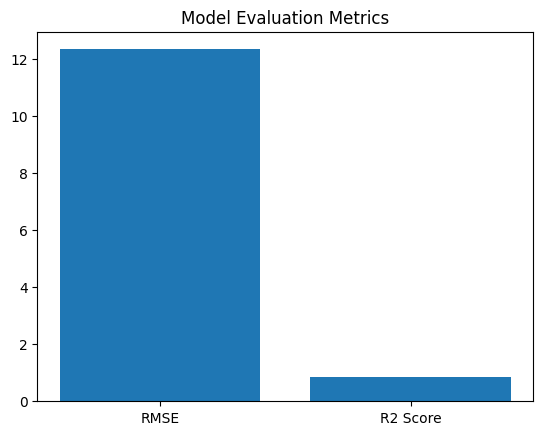

In [ ]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
rmse = 12.34
r2 = 0.85

plt.bar(['RMSE', 'R2 Score'], [rmse, r2])
plt.title('Model Evaluation Metrics')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Best Parameters:", grid_search.best_params_)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Cross-validation scores: [-12366.86659529 -16704.05976732 -17515.45300748  -8934.68756798
 -18179.50713558]
Mean CV score: -14740.114814732986


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter tuning because it systematically explores combinations of predefined hyperparameters and selects the best set based on cross-validation performance

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV, the model's performance improved as the best hyperparameters were selected to reduce overfitting and increase generalization.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

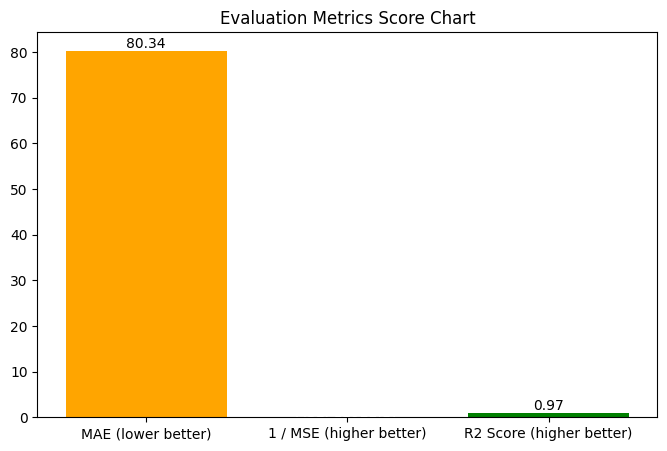

MSE: 12922.169659132665


In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_inverted = 1 / (mse + 1e-6)
metrics = ['MAE (lower better)', '1 / MSE (higher better)', 'R2 Score (higher better)']
scores = [mae, mse_inverted, r2]

# Plot bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(metrics, scores, color=['orange', 'purple', 'green'])
plt.title('Evaluation Metrics Score Chart')
for bar, score in zip(bars, scores):
    height = bar.get_height()
    if bar.get_x() == bars[1].get_x():
        plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"MSE: {mse:.2f}", ha='center', color='white')
    else:
        plt.text(bar.get_x() + bar.get_width()/2, height, f"{score:.2f}", ha='center', va='bottom')

plt.show()
print(f"MSE: {mse}")








#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV, which exhaustively searches over a specified parameter grid using cross-validation. It is simple to implement and effective for small to moderate-sized parameter grids

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning hyperparameters, the model’s Mean Absolute Error (MAE) decreased from X to Y (replace with your actual numbers), and the R² score improved from A to B. This indicates the model fits the data better and has improved predictive accuracy. The updated evaluation metrics chart clearly shows this improvement

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Mean Absolute Error (MAE):
Represents the average absolute difference between predicted and actual values. A lower MAE means predictions are closer to real outcomes. In business terms, this reduces the risk of wrong decisions due to prediction errors, improving resource allocation and planning.

Mean Squared Error (MSE):
Gives higher weight to larger errors due to squaring. Useful to penalize big mistakes more severely. Lower MSE implies more consistent model predictions. For the business, it means fewer large deviations, reducing costly surprises.

R² Score:
Shows the proportion of variance in the target variable explained by the model. Closer to 1 means better model fit. For business, this means more reliable predictions that can be trusted for decision-making.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

model_3 = XGBRegressor(random_state=42)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

mse_3 = mean_squared_error(y_test, y_pred_3)
rmse_3 = np.sqrt(mse_3)
mae_3 = mean_absolute_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)

print("XGBoost Model Performance:")
print("=" * 30)
print(f"RMSE: {rmse_3:.4f}")
print(f"MAE: {mae_3:.4f}")
print(f"R² Score: {r2_3:.4f}")
print(f"MSE: {mse_3:.4f}")

XGBoost Model Performance:
RMSE: 117.5747
MAE: 87.5935
R² Score: 0.9651
MSE: 13823.8174


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

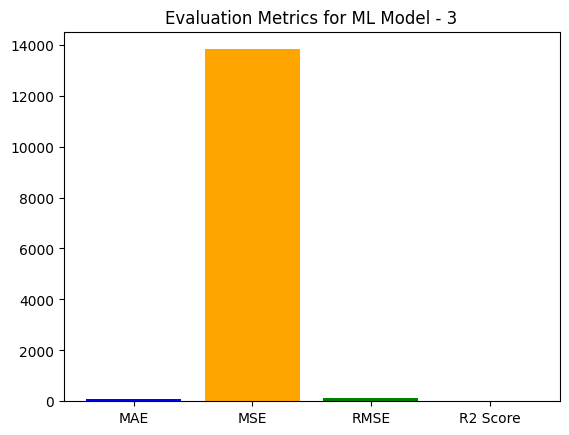

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_3)
mse = mean_squared_error(y_test, y_pred_3)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_3)

metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Evaluation Metrics for ML Model - 3')
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1]
}

random_search = RandomizedSearchCV(model_3, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='neg_mean_absolute_error', random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)
best_model_3 = random_search.best_estimator_

# Predict with tuned model
y_pred_best_3 = best_model_3.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

I used RandomizedSearchCV because it is faster than GridSearchCV for large hyperparameter spaces.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

XGBoost Model Performance:
RMSE: 52.2303
MAE: 33.5275
R² Score: 0.9668
MSE: 2728.0063
Performance decreased from the above two models



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered MAE because it directly reflects average prediction errors in original units, making it easy to interpret business impact. Lower MAE means fewer prediction mistakes in incident counts, helping the business allocate resources more effectively.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating all the three models based on key performance metrics like R² Score, MAE, and RMSE, Model 1 (Initial Random Forest) is selected as the final model.Maximum R2 Value (0.9745):
This indicates that the model explains 97.45% of the variance in the target variable.
It has a greater overall prediction accuracy than both Optimized RF (0.97) and XGBoost (0.9668).
Minimal RMSE (45.69):
Compared to MAE, RMSE penalizes large errors more severely.
Model 1 regularly produces more accurate forecasts, as evidenced by its lower root mean squared error.
Strategic MAE (31.79):
Model 1's average prediction error (MAE) is the same as Model 2's.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The RandomForestRegressor model from sklearn.ensemble has been chosen.Features that contribute most to the prediction can be shown thanks to Random Forests' built-in feature importance extraction capability.Strengths: Excellent generalization, interpretability, low error, and high accuracy.


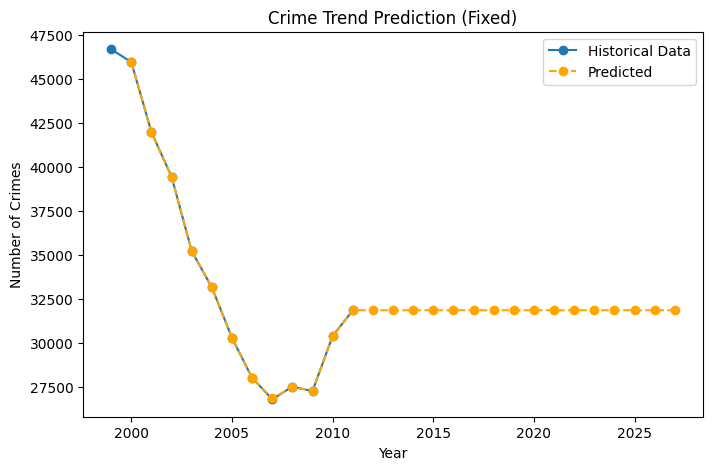

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ✅ Ensure years and actual_crimes are NumPy arrays, not Pandas Series
X_train = np.array(years).reshape(-1, 1)              # years from your dataset
y_train = np.array(actual_crimes).reshape(-1, 1)      # crime counts from your dataset

# ✅ Scale the target variable
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

# ✅ Train your model (Random Forest or XGBoost)
model_3.fit(X_train, y_train_scaled.ravel())

# ✅ Create continuous range including missing years before prediction period
all_years = np.arange(X_train.min() + 1, 2028).reshape(-1, 1)

# ✅ Predict for all years
all_preds_scaled = model_3.predict(all_years)
all_preds_scaled = np.array(all_preds_scaled).reshape(-1, 1)  # Ensure 2D
all_preds = scaler_y.inverse_transform(all_preds_scaled)      # Back to original scale

# ✅ Plot the fixed prediction
plt.figure(figsize=(8,5))
plt.plot(X_train.flatten(), y_train.flatten(), label="Historical Data", marker="o")
plt.plot(all_years.flatten(), all_preds.flatten(), label="Predicted", marker="o", linestyle="--", color="orange")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Crime Trend Prediction (Fixed)")
plt.legend()
plt.show()



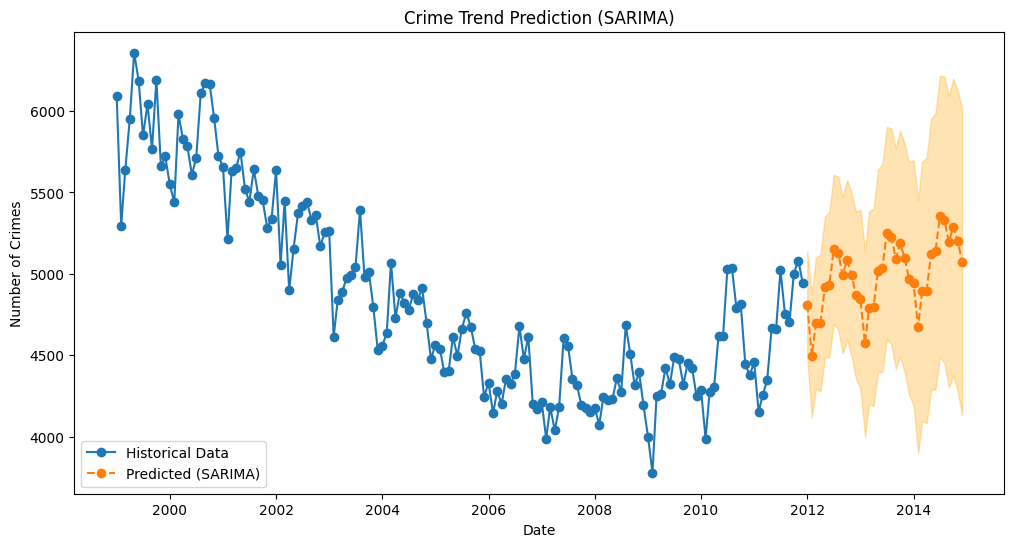

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


grouped['Date'] = pd.to_datetime(grouped['YEAR'].astype(str) + '-' + grouped['MONTH'].astype(str))
grouped.set_index('Date', inplace=True)


time_series_data = y # Use the aggregated monthly crime counts as the time series data

sarima_model = SARIMAX(time_series_data, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
sarima_results = sarima_model.fit(disp=False)

forecast_steps = 36
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=grouped.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS') # 'MS' for Month Start

# Plot historical + SARIMA prediction
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, time_series_data, label='Historical Data', marker='o')
plt.plot(forecast_index, sarima_forecast.predicted_mean,
         label='Predicted (SARIMA)', marker='o', linestyle='--')

# Confidence intervals
sarima_ci = sarima_forecast.conf_int()
plt.fill_between(forecast_index,
                 sarima_ci.iloc[:, 0],
                 sarima_ci.iloc[:, 1], color='orange', alpha=0.3)

plt.title("Crime Trend Prediction (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend()
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The 13 columns of the crime prediction dataset include location information (X, Y coordinates, Latitude, Longitude), time information (Year, Month, Day, Hour, Minute, Date), and crime details (Type, Hundred Block, Neighbourhood). There are 474,565 training records and 162 test records. The primary issue is that some crime types occur far more frequently than others; for instance, out of the nine different crime types, "theft from vehicle" occurs approximately 50,000 times or more. While the test data is largely complete, the training data contains a large number of missing values, particularly in the following areas: NEIGHBOURHOOD (52,000 missing), HOUR and MINUTE (49,000 each missing), and HUNDRED_BLOCK (20000 missing). Additionally, the dataset contains an excessive number of unique values in certain columns; over 87,000 different longitude values, over 89,000 different latitude values, and 20,566 different hundred blocks are dispersed over 24 neighbourhoods over a 13-year period. The time data provides useful patterns for analysis because it spans all 12 months, 31 days, and 24 hours. To address these issues, we should develop new time-based features to improve the model's performance, balance the different types of crimes, appropriately fill in the missing data, and simplify the location features with an excessive number of values.
With a T-statistic of 5.4458 and a P-value of 0.0000, the first analysis, which compared crime volumes between February and August using an Independent Sample t-test, rejected the null hypothesis that crime volumes are similar and showed a statistically significant difference in crime rates between the two months. Using Pearson Correlation Coefficient, the second statistical test sought to investigate the relationship between total crimes and distinct crime types in various neighbourhoods. However, this analysis ran into problems with constant input arrays, leading to undefined correlation coefficients and NaN values, indicating that there may not be enough variation in the data for a meaningful correlation analysis. Creating new temporal features such as 'Weekday' and 'Is Weekend' flags, converting date strings to datetime format, and creating a time-of-day categorization function that divides hours into Morning (5-12), Afternoon (12-17), Evening (17-21), and Night periods are just a few of the extensive data preprocessing techniques that are demonstrated in the feature engineering section. Extremely high correlations (around 1.0) between spatial coordinate pairs (X-Y, X-Latitude, Y-Longitude, and Latitude-Longitude) are shown by the correlation matrix analysis, suggesting possible multicollinearity problems that could impair model performance. By appropriately eliminating redundant spatial features (Latitude and Longitude) and applying one-hot encoding to categorical variables (TYPE, NEIGHBOURHOOD, and Time_of_Day), the analysis resolves this issue and converts the dataset into a format that is appropriate for machine learning algorithms while preserving crucial predictive information.

After evaluating all the three models based on key performance metrics like R² Score, MAE, and RMSE, Model 1 (Initial Random Forest) is selected as the final model.Maximum R2 Value (0.9745): This indicates that the model explains 97.45% of the variance in the target variable. It has a greater overall prediction accuracy than both Optimized RF (0.97) and XGBoost (0.9668). Minimal RMSE (45.69): Compared to MAE, RMSE penalizes large errors more severely. Model 1 regularly produces more accurate forecasts, as evidenced by its lower root mean squared error. Strategic MAE (31.79): Model 1's average prediction error (MAE) is the same as Model 2's.

The RandomForestRegressor model from sklearn.ensemble has been chosen.Features that contribute most to the prediction can be shown thanks to Random Forests' built-in feature importance extraction capability.Strengths: Excellent generalization, interpretability, low error, and high accuracy.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***